# Домашняя работа № 3

## 1. Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

### 1.1 Загрузка данных

In [2]:
data = data = pd.read_csv('../data/train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


- Посмотрим на 10 случайных строк

In [3]:
random.seed(5)
random_indxs = random.sample(range(0, data.shape[0]), 10)
print("10 случайных строк из датафрейма:")
data.iloc[random_indxs]

10 случайных строк из датафрейма:


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5102,68,113.15,7856,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,1
2092,1,19.95,19.95,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2937,66,102.40,6471.85,Female,1,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
4342,25,19.90,505.45,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,0
237,41,114.50,4527.45,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1
3814,8,20.00,141.6,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
2040,20,24.45,482.8,Female,0,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
424,48,19.95,1004.5,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),0
1284,12,73.75,871.4,Male,0,No,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
927,70,109.50,7674.55,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [5]:
print(f'Shape of data: {data.shape}')

Shape of data: (5282, 20)


- Таким образом, в датасете 20 признаков и 5282 сэмплов. Пропусков нет (пока что)

### 1.2 Анализ данных

In [6]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

- Заметим, что признак TotalSpent - числовой, но данные в столбце типа object, преобруем его

In [7]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce', downcast='float')

In [8]:
data['TotalSpent'].info

<bound method Series.info of 0       1026.349976
1       1872.199951
2         75.900002
3       2570.000000
4       6758.450195
           ...     
5277      82.150002
5278    2188.449951
5279      55.049999
5280    2215.250000
5281    1375.599976
Name: TotalSpent, Length: 5282, dtype: float32>

- Убедимся ещё раз, что в данных нет пропусков

In [9]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

- Заметим, что после преобразования признака TotalSpend появились пропущенные значения. Посмотрим на строки с пропусками

In [10]:
data[data['TotalSpent'].isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


- Заметим, что у всех этих строк ClientPeriod равен 0. Посмотрим на все строки где период клиента равен 0

In [11]:
data[data['ClientPeriod'] == 0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


- Заметим, что ClientPeriod равен 0 ТОЛЬКО в строках с NaN в TotalSpent. Это означает, что это новые клиенты, которые только что подключились и еще не совершили никаких платежей

- Обработаем пропуски следующим образом:
    - NaN в TotalSpent заменим на 0, так как новые клиенты еще не совершили платежей
    - Создадим новый бинарный признак IsNewClient

In [12]:
data['IsNewClient'] = data['TotalSpent'].isna().astype(int)
data['TotalSpent'] = data['TotalSpent'].fillna(0)

cat_cols.append('IsNewClient')

- Проверим основные статистики на числовых признаках

In [13]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486084
std,24.550326,30.176464,2269.048584
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,395.725006
50%,29.000000,70.400000,1405.650024
75%,55.000000,90.050000,3795.212463
max,72.000000,118.750000,8684.799805


- Заметим, что у TotalSpent большой разброс значений:
    - Min = 0
    - Max = 8684.8
    - Стандартное отклонение очень большое и равно 2269.05

- Построим графики для числовых признаков

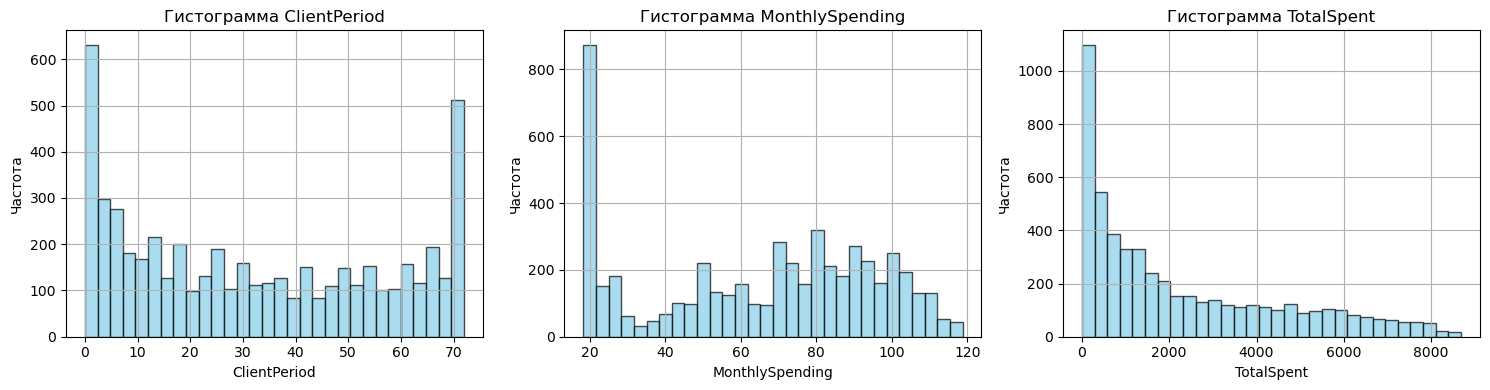

In [14]:
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for i, col in enumerate(num_cols):
    data[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

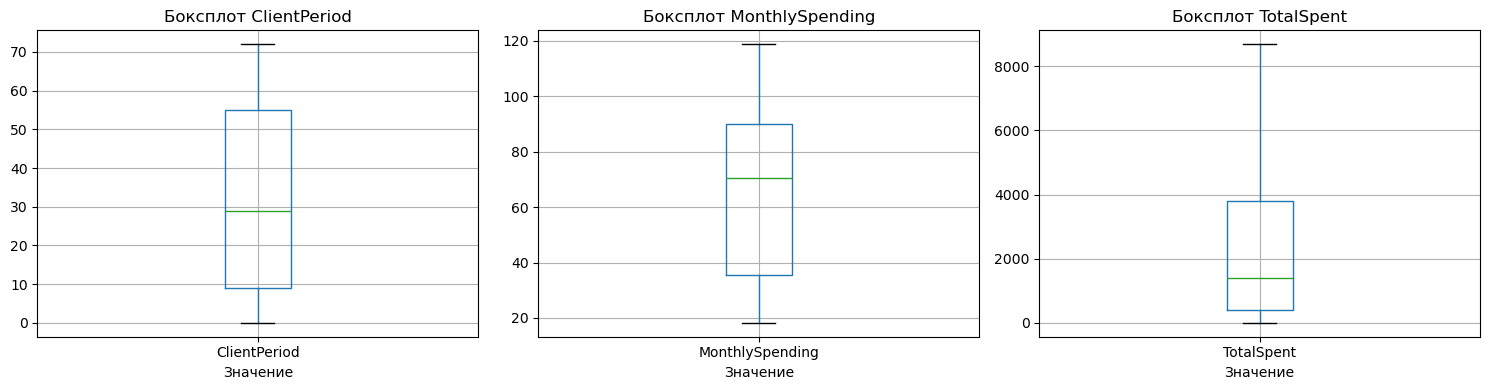

In [15]:
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for i, col in enumerate(num_cols):
    data.boxplot(column=col, ax=axes[i], vert=True)
    axes[i].set_title(f'Боксплот {col}')
    axes[i].set_xlabel('Значение')

plt.tight_layout()
plt.show()

- Таким образом, выбросов нет 

- Посмотрим на категориальные признаки

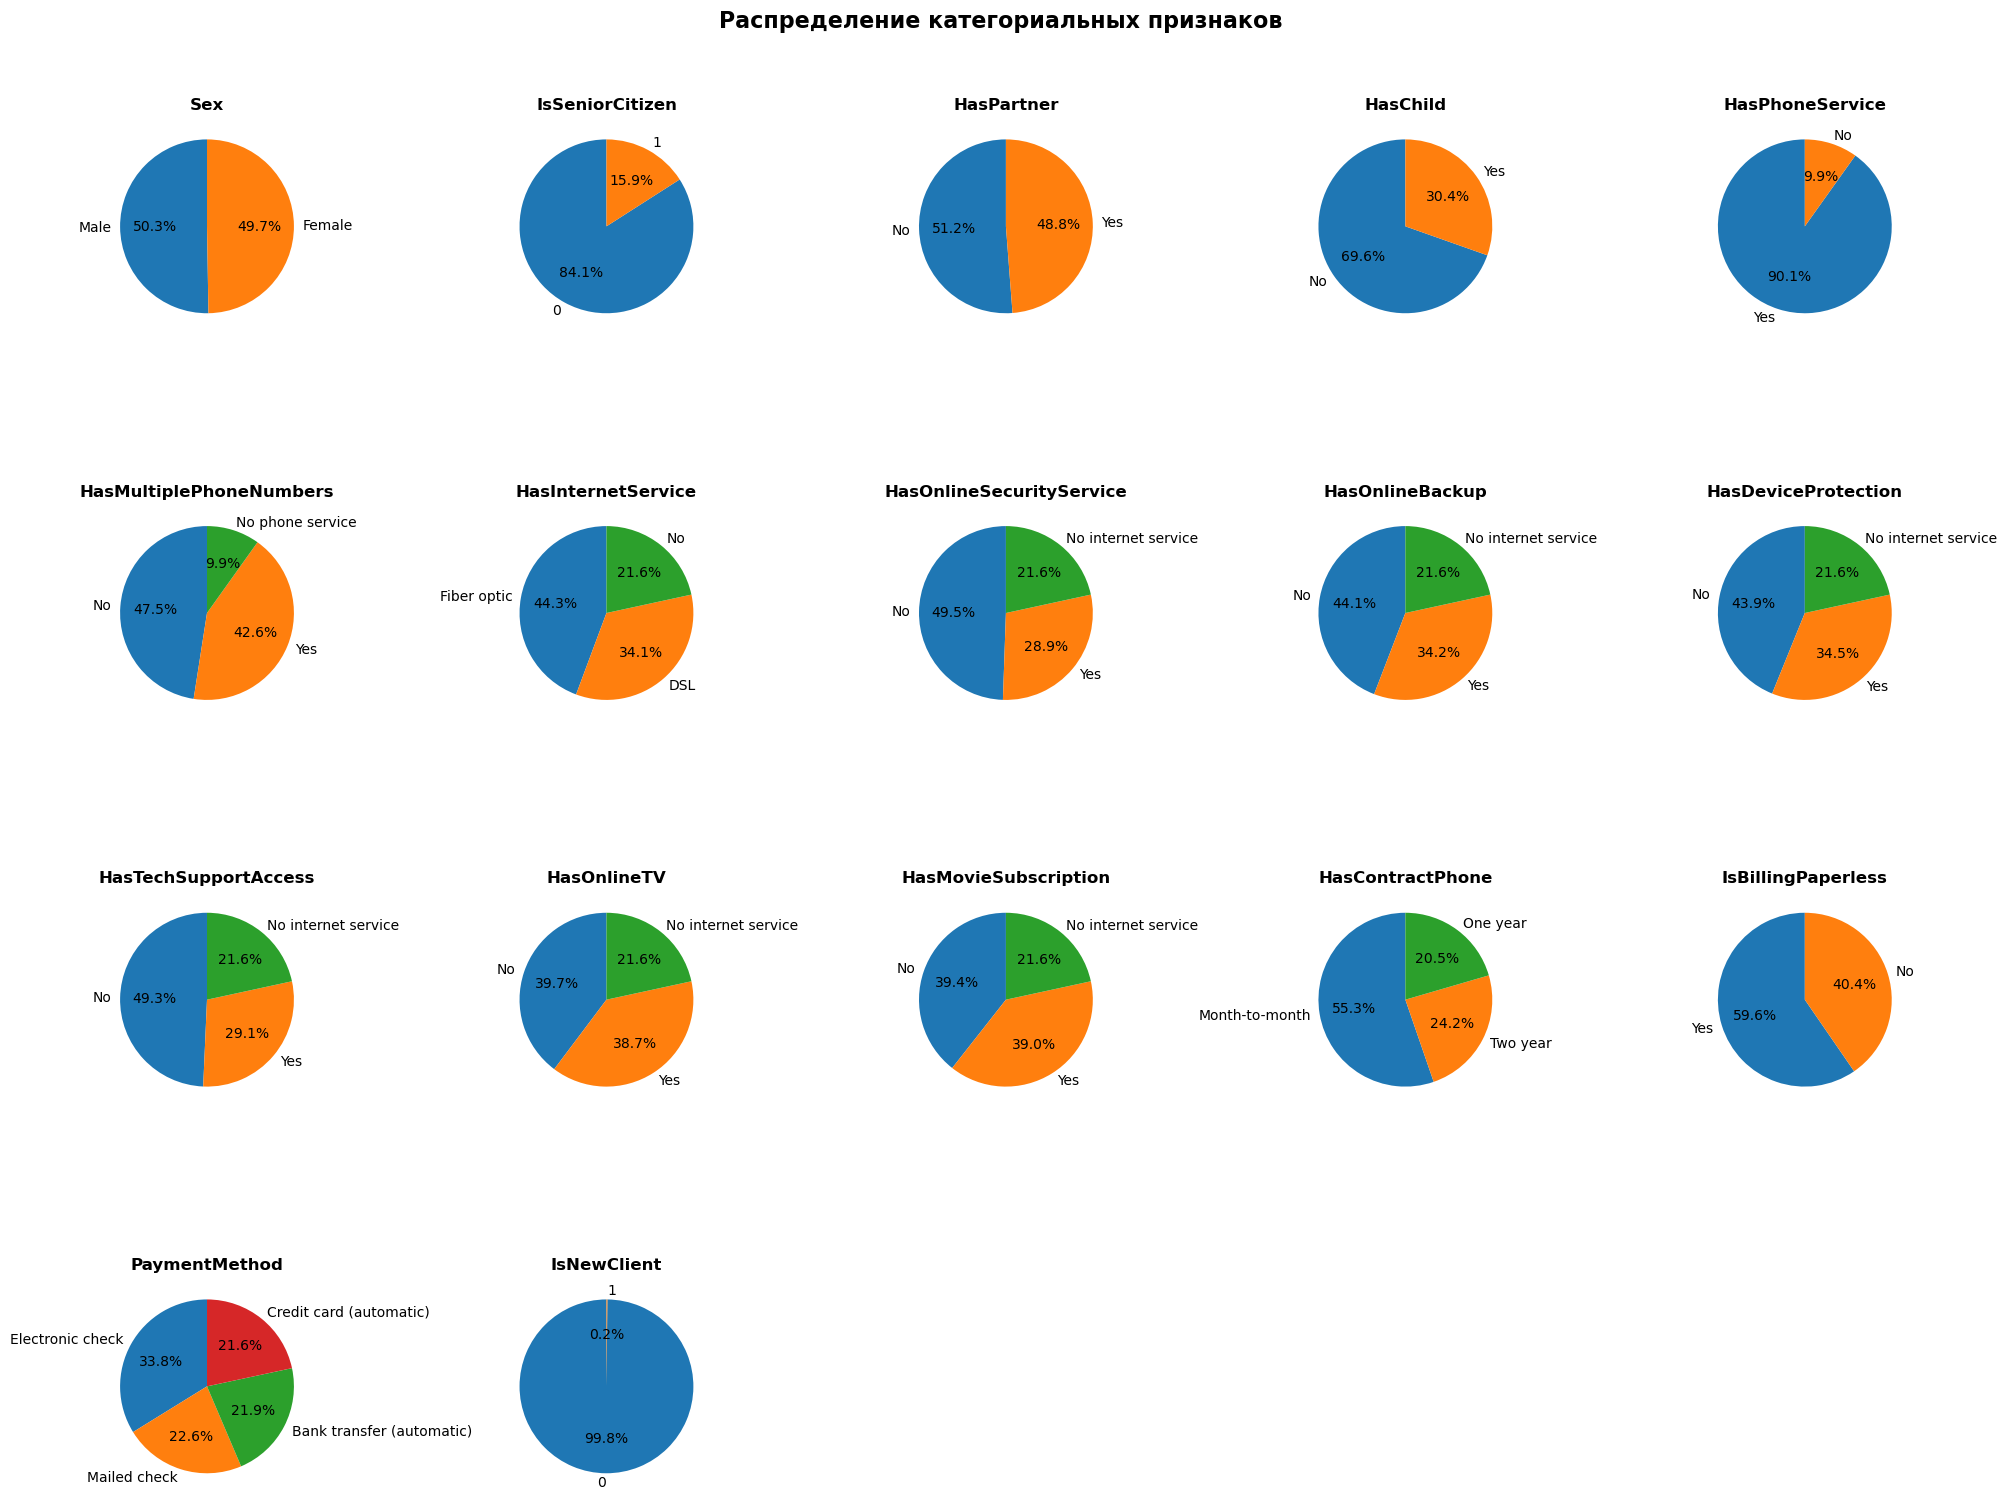

In [16]:
n_cols = 5
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if i < len(axes):
        # Считаем значения
        value_counts = data[col].value_counts()
        
        # Строим круговую диаграмму
        wedges, texts, autotexts = axes[i].pie(
            value_counts.values, 
            labels=value_counts.index,
            autopct='%1.1f%%',
            startangle=90,
        )
        axes[i].set_title(f'{col}', fontweight='bold', fontsize=12)

# Скрываем пустые subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Распределение категориальных признаков', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

- Бинарные признаки с категориями Yes/No заменим на 1/0

In [17]:
bool_features = ['HasChild', 'HasPartner', 'HasPhoneService', 'IsBillingPaperless']
data[bool_features] = data[bool_features].replace({'Yes': 1, 'No': 0})

C:\Users\Алёна\AppData\Local\Temp\ipykernel_16032\263778250.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[bool_features] = data[bool_features].replace({'Yes': 1, 'No': 0})


- Теперь посмотрим на распределение таргета

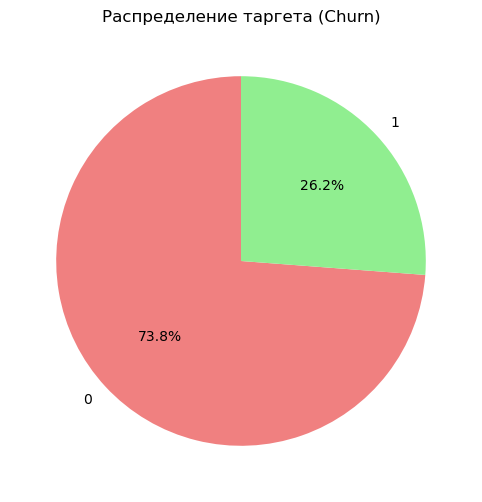

In [18]:
target_counts = data['Churn'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    target_counts.values, 
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightgreen']
)
plt.title('Распределение таргета (Churn)')
plt.show()

**Вывод:** таргет не сбалансирован. Класс 0 преобладает над классом 1 примерно в 3 раза. 
- Не будем использовать метрику accuracy, так как она будет неверно оценивать качество модели

## 2. Применение линейных моделей

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

In [20]:
X = data.drop(columns=['Churn'])
y = data['Churn']

- Разделим данные на 3 части: train/validation/test как 60/20/20

In [21]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

- Создадим паплайн обработки признаков:
    - Применим OneHotEncoder для категориальных признаков (кроме бинарных)
    - Отнормируем числовые признаки при помощи StandardScaler

In [22]:
features_to_encode = [col for col in cat_cols if col not in bool_features]

data_processor = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), features_to_encode),
    ('numerical', StandardScaler(), num_cols),
    ('boolean', 'passthrough', bool_features)
])

- Обучим этот паплайн на тренировочных данных, применим к валидационным и тестовым данным

In [23]:
X_train_processed = data_processor.fit_transform(X_train)
feature_names = data_processor.get_feature_names_out()
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)

X_val_processed = pd.DataFrame(data_processor.transform(X_val), columns=feature_names, index=X_val.index)
X_test_processed = pd.DataFrame(data_processor.transform(X_test), columns=feature_names, index=X_test.index)

In [24]:
print('Shape of data after proccessing')
print(f'Shape of train data: {X_train_processed.shape}')
print(f'Shape of train data: {X_val_processed.shape}')
print(f'Shape of train data: {X_test_processed.shape}')

Shape of data after proccessing
Shape of train data: (3380, 44)
Shape of train data: (845, 44)
Shape of train data: (1057, 44)


In [25]:

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(X_train[features_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out()).reset_index(drop=True)

X_train_encoded = X_train.drop(columns=features_to_encode).reset_index(drop=True)
X_train_encoded = pd.concat([X_train_encoded, encoded_df], axis=1)

In [26]:
print(X_train_encoded.shape)

(3380, 44)


In [27]:
X_train_encoded.head()

,ClientPeriod,MonthlySpending,TotalSpent,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,Sex_Female,Sex_Male,IsSeniorCitizen_0,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,IsNewClient_0,IsNewClient_1
0,61,20.25,1278.800049,1,0,1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,75.30,75.300003,0,0,1,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,95.00,3008.149902,1,0,1,1,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,30,70.40,2044.750000,0,0,1,0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,71,85.45,6028.950195,0,1,1,1,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


- Отнормируем числовые признаки

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_encoded[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols).reset_index(drop=True)

X_train_encoded[num_cols] = scaled_df

In [29]:
X_train_encoded[bool_features]

,HasChild,HasPartner,HasPhoneService,IsBillingPaperless
0,0,1,1,0
1,0,0,1,0
2,0,1,1,1
3,0,0,1,0
4,1,0,1,1
...,...,...,...,...
3375,0,0,0,1
3376,0,1,1,0
3377,1,1,1,0
3378,0,1,1,1


In [30]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3380 entries, 681 to 5182
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   categorical__Sex_Female                                    3380 non-null   float64
 1   categorical__Sex_Male                                      3380 non-null   float64
 2   categorical__IsSeniorCitizen_0                             3380 non-null   float64
 3   categorical__IsSeniorCitizen_1                             3380 non-null   float64
 4   categorical__HasMultiplePhoneNumbers_No                    3380 non-null   float64
 5   categorical__HasMultiplePhoneNumbers_No phone service      3380 non-null   float64
 6   categorical__HasMultiplePhoneNumbers_Yes                   3380 non-null   float64
 7   categorical__HasInternetService_DSL                        3380 non-null   float64
 8   categorical

### LogisticRegressionCV

In [31]:
model_cv = LogisticRegressionCV(
    Cs=[0.001, 0.01, 0.1, 1, 10, 100],                    
    cv=5,
    class_weight='balanced', # Так как таргет несбалансирован                    
    random_state=42,
    max_iter=1000,
    scoring='roc_auc',
    refit=True      
)
model_cv.fit(X_train_processed, y_train)

print(f"Лучший C: {model_cv.C_}")

best_roc_auc = model_cv.scores_[1].mean(axis=0).max()
print(f"Лучший ROC-AUC (CV): {best_roc_auc:.4f}")


Лучший C: [1.]
Лучший ROC-AUC (CV): 0.8346


### LogisticRegression + GridSearchCV

In [32]:
model_grid = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model_grid, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_processed, y_train)

best_model_lg = grid_search.best_estimator_
print(f"Лучший C: {grid_search.best_params_}")
print(f"Лучший ROC-AUC: {grid_search.best_score_:.4f}")

Лучший C: {'C': 1}
Лучший ROC-AUC: 0.8345


In [33]:
y_train_predicted_lg = best_model_lg.predict_proba(X_train_processed)[:, 1]
y_val_predicted_lg = best_model_lg.predict_proba(X_val_processed)[:, 1]

train_auc_lg = roc_auc_score(y_train, y_train_predicted_lg)
val_auc_lg = roc_auc_score(y_val, y_val_predicted_lg)

print(f'ROC-AUC train: {train_auc_lg}')
print(f'ROC-AUC val: {val_auc_lg}')

ROC-AUC train: 0.8410584952418535
ROC-AUC val: 0.8630279034690799


- Таким образом, лучшего качества по метрике ROC_AUC (0.8630) удалось получить с параметром С=1

## 3. Применение градиентного бустинга

In [34]:
from catboost import CatBoostClassifier

### CatBoostClassifier

In [35]:
boosting_model = CatBoostClassifier(n_estimators=200, cat_features=cat_cols)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_val_predicted = boosting_model.predict_proba(X_val)[:, 1]

Learning rate set to 0.075812
0:	learn: 0.6443708	total: 201ms	remaining: 40s
1:	learn: 0.6046058	total: 228ms	remaining: 22.5s
2:	learn: 0.5816477	total: 236ms	remaining: 15.5s
3:	learn: 0.5567272	total: 257ms	remaining: 12.6s
4:	learn: 0.5353243	total: 289ms	remaining: 11.3s
5:	learn: 0.5201139	total: 302ms	remaining: 9.78s
6:	learn: 0.5056264	total: 320ms	remaining: 8.82s
7:	learn: 0.4931868	total: 339ms	remaining: 8.14s
8:	learn: 0.4804357	total: 359ms	remaining: 7.63s
9:	learn: 0.4695598	total: 380ms	remaining: 7.22s
10:	learn: 0.4627494	total: 401ms	remaining: 6.88s
11:	learn: 0.4557478	total: 423ms	remaining: 6.63s
12:	learn: 0.4498188	total: 445ms	remaining: 6.4s
13:	learn: 0.4441444	total: 466ms	remaining: 6.2s
14:	learn: 0.4398786	total: 488ms	remaining: 6.02s
15:	learn: 0.4374702	total: 498ms	remaining: 5.73s
16:	learn: 0.4343846	total: 520ms	remaining: 5.6s
17:	learn: 0.4326848	total: 531ms	remaining: 5.37s
18:	learn: 0.4308281	total: 545ms	remaining: 5.19s
19:	learn: 0.429

In [36]:
train_auc = roc_auc_score(y_train, y_train_predicted)
val_auc = roc_auc_score(y_val, y_val_predicted)

print(train_auc)
print(val_auc)

0.8902836333158951
0.861389082260123


- Наилучший ROC-AUC =  0.8614

### CatBoostClassifier + RandomizedSearchCV

In [37]:
catboost_model = CatBoostClassifier(n_estimators=200, cat_features=cat_cols, verbose=0, thread_count=-1)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

grid_search_boost = RandomizedSearchCV(
    catboost_model,
    param_grid, 
    n_iter=5,
    cv=3, 
    scoring='roc_auc'
)
grid_search_boost.fit(X_train, y_train)

best_model_boost = grid_search_boost.best_estimator_
print(f"Лучшие параметры: {grid_search_boost.best_params_}")

Лучшие параметры: {'learning_rate': 0.05, 'depth': 6}


In [38]:
y_train_predicted_boost = best_model_boost.predict_proba(X_train)[:, 1]
y_val_predicted_boost = best_model_boost.predict_proba(X_val)[:, 1]

train_auc_boost = roc_auc_score(y_train, y_train_predicted_boost)
val_auc_boost = roc_auc_score(y_val, y_val_predicted_boost)

print(f'ROC-AUC train: {train_auc_boost}')
print(f'ROC-AUC val: {val_auc_boost}')

ROC-AUC train: 0.875818895371465
ROC-AUC val: 0.8660372432996868


- Наилучший ROC-AUC =  0.8658

### Вывод: лучшая модель CatBoostClassifier c подбором парметров через RandomizedSearchCV

## 4. Предсказания

- Проверим качество модели на тесте

In [39]:
best_model = best_model_boost
y_test_predicted_boost = best_model_boost.predict_proba(X_test)[:, 1]
test_auc_boost = roc_auc_score(y_test, y_test_predicted_boost)
# Сравнение результатов
print(f'ROC-AUC train: {train_auc_boost}')
print(f'ROC-AUC val: {val_auc_boost}')
print(f'ROC-AUC val: {test_auc_boost}')

ROC-AUC train: 0.875818895371465
ROC-AUC val: 0.8660372432996868
ROC-AUC val: 0.8556674072017032


- Таким образом, на тестовой выборке получился результат ROC-AUC = 0.8569